In [ ]:
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random as python_random

Classificação da base Cardiovascular Disease. Esta base contém resultados de exames
de diversos pacientes. O problema de classificação associado a essa base é de
identificar se o paciente, com base em seus exames possui ou não uma doença
cardiovascular. A base está disponível no arquivo cardio.csv. Mais detalhes sobre a
base estão disponíveis em:
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
Para esta atividade, vocês devem elaborar um problema de classificação com 85% da
base para treinamento e 15% para teste e encontrar uma configuração de Redes
Neurais que atinja uma acurácia média acima de 70%. Para realizar a média, vocês
podem utilizar o resultado de 30 classificações, como fizemos nas atividades
anteriores. Para esta atividade, vocês podem aproveitar o notebook
redes-neurais-cardio.ipynb, disponibilizado na aula anterior.

In [ ]:
original_data = pd.read_csv("https://raw.githubusercontent.com/GabrielMarques369/Tabelas/main/Cardio.csv", sep=';')
data = original_data.iloc[:, 1:]

X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

print(len(X))

70000


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

sc = StandardScaler()
sc.fit(X_train)

X_train_scaled = sc.transform(X_train.values)
X_test_scaled = sc.transform(X_test.values)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
SEED = 0

np.random.seed(SEED)
python_random.seed(SEED)
tf.random.set_seed(SEED)

ann = keras.Sequential()
ann.add(layers.Dense(6, activation='relu'))
ann.add(layers.Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

i=0

while i <=30 :
  history = ann.fit(X_train, y_train, batch_size=128, epochs=3)
  y_pred = ann.predict(X_test)
  y_pred = (y_pred > 0.5)

  i = i + 1


Epoch 1/3
465/465 [==============================] - 1s 1ms/step - loss: 47.4030 - accuracy: 0.4983
Epoch 2/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7525 - accuracy: 0.5061
Epoch 3/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7444 - accuracy: 0.5051
Epoch 1/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7593 - accuracy: 0.5033
Epoch 2/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7528 - accuracy: 0.5048
Epoch 3/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7391 - accuracy: 0.5062
Epoch 1/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7497 - accuracy: 0.5049
Epoch 2/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7411 - accuracy: 0.5073
Epoch 3/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7261 - accuracy: 0.5124
Epoch 1/3
465/465 [==============================] - 1s 1ms/step - loss: 0.7366 - accuracy: 0.5130
Epoch 2/3

In [ ]:
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7055238095238096

Classificação da base Titanic. Esta base lista os tripulantes do Titanic, indicando quais
deles sobreviveram ao naufrágio. O problema de classificação para essa base é
exatamente predizer, com base nos dados de cada tripulante, se ele sobreviveu ou não.
A divisão entre treinamento e teste já está feita nos arquivos disponibilizados, em
titanic_train.csv e titanic_test.csv, respectivamente. Além disso, o arquivo test_y.csv
apresenta as respostas para a base de testes. O notebook redes-neurais-titanic.ipynb
realiza um processamento inicial da base e pode ser utilizado neste exercícios.
No caso deste exercício, além de melhorar os resultados, vocês devem utilizar seu
melhor modelo para testar a base disponibilizada na competição Kaggle descrita abaixo
e que se aplica à base TItanic:

https://www.kaggle.com/competitions/titanic/overview/evaluation
Para essa atividade, vocês devem criar uma conta na Kaggle, entrar na competição
acima e submeter as respostas conforme as instruções da plataforma. Em seguida,
tirem um print do leaderboard indicando onde vocês apareceram no ranking da
competição.

In [ ]:
tita_test_data = pd.read_csv("https://raw.githubusercontent.com/GabrielMarques369/Tabelas/main/titanic_test.cvs", sep=',')
tita_train_data = pd.read_csv("https://raw.githubusercontent.com/GabrielMarques369/Tabelas/main/titanic_train.csv", sep=',')
tita_test_y = pd.read_csv("https://raw.githubusercontent.com/GabrielMarques369/Tabelas/main/test_y.csv", sep=',')

In [ ]:
# Removendo colunas que não devem trazer muita informação relevante
tita_train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
tita_test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
# Transformando valores texto em número. Com o label encoder, os valores são de 0 a (número total de valores distintos - 1)
le = LabelEncoder()
tita_train_data["Sex"] = le.fit_transform(tita_train_data["Sex"])
tita_test_data["Sex"] = le.fit_transform(tita_test_data["Sex"])

In [ ]:
# Transformação One-hot Encoder faz a transformação a partir da criação de diferentes colunas. 
# Isso evita um viés em informações onde ele não ocorre.
enc = OneHotEncoder(handle_unknown='ignore')

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(tita_train_data[['Embarked']]).toarray())
tita_train_data = tita_train_data.iloc[: , :-1]
pd.concat([tita_train_data, one_hot_encond_temp], axis=1, ignore_index=False)

one_hot_encond_temp = pd.DataFrame(enc.fit_transform(tita_test_data[['Embarked']]).toarray())
tita_test_data = tita_test_data.iloc[: , :-1]
pd.concat([tita_test_data, one_hot_encond_temp], axis=1, ignore_index=False)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,892,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,893,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,894,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,895,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,896,3,0,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,0.0,0.0,1.0
414,1306,1,0,39.0,0,0,108.9000,1.0,0.0,0.0
415,1307,3,1,38.5,0,0,7.2500,0.0,0.0,1.0
416,1308,3,1,NaN,0,0,8.0500,0.0,0.0,1.0


In [ ]:
#Tratamento dos dados faltantes, substituindo as linhas faltantes por um valor fixo, que no caso, para as colunas numéricas Age e Fare, 
#substituímos os dados faltantes pela média. Já as colunas SibSp e Parch tiveram seus dados substituídos por -1.

tita_train_data['Age'].fillna(tita_train_data['Age'].mean(), inplace=True)
tita_train_data['Fare'].fillna(tita_train_data['Fare'].mean(), inplace=True)
tita_train_data['SibSp'].fillna(-1, inplace=True)
tita_train_data['Parch'].fillna(-1, inplace=True)

tita_test_data['Age'].fillna(tita_train_data['Age'].mean(), inplace=True)
tita_test_data['Fare'].fillna(tita_train_data['Fare'].mean(), inplace=True)
tita_test_data['SibSp'].fillna(-1, inplace=True)
tita_test_data['Parch'].fillna(-1, inplace=True)

In [ ]:
test_passenger_ids = tita_test_data['PassengerId']

In [ ]:
tita_train_data.drop(['PassengerId'], axis=1, inplace=True)
tita_test_data.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
XTrain = tita_train_data.iloc[: , 1 : ]
yTrain = tita_train_data.iloc[: , 0]

XTest = tita_test_data

In [ ]:
sc = StandardScaler()
sc.fit(XTrain)

XTrain = sc.transform(XTrain.values)
XTest = sc.transform(XTest.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
ppn = Perceptron(max_iter=418, eta0=0.1, random_state=0) 

ppn.fit(XTrain, yTrain)

Perceptron(eta0=0.1, max_iter=418)

In [ ]:
yPred = ppn.predict(XTest)
y_test = pd.read_csv("https://raw.githubusercontent.com/GabrielMarques369/Tabelas/main/test_y.csv")

In [ ]:
y_test = pd.read_csv("https://raw.githubusercontent.com/GabrielMarques369/Tabelas/main/test_y.csv")
y_test = y_test[y_test['PassengerId'].isin(test_passenger_ids)]
y_test = y_test['Survived'].values

In [ ]:
confusion_matrix(y_test, yPred)

array([[197,  69],
       [ 14, 138]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


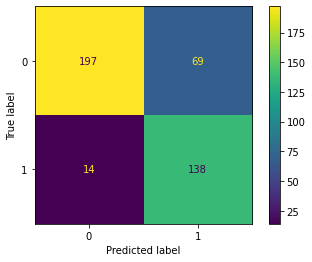

In [ ]:
plot_confusion_matrix(ppn, XTest, y_test)

In [ ]:
accuracy_score(y_test, yPred)

0.8014354066985646

In [ ]:
resposta_submit = pd.DataFrame()

In [ ]:
resposta_submit['PassengerId'] = test_passenger_ids
resposta_submit['Survived'] = yPred

In [ ]:
resposta_submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
resposta_submit.to_csv('submit.csv')